<a href="https://colab.research.google.com/github/zareefrj/Time-Series-Forecasting/blob/main/ARIMA_MSW%20Waste_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARIMA Forecasting**

Step 1: Visualizing the dataset

In [1]:
import pandas as pd
df=pd.read_csv('MSW12-18.csv',index_col='Date',parse_dates=True, dayfirst=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (2988, 3)


,area,waste_type,Amount
Date,,,
2012-01-01,Boralesgamuwa UC,MSW,17340
2012-01-02,Boralesgamuwa UC,MSW,25980
2012-01-03,Boralesgamuwa UC,MSW,29220
2012-01-04,Boralesgamuwa UC,MSW,7450
2012-01-05,Boralesgamuwa UC,MSW,10520
...,...,...,...
2018-12-29,Boralesgamuwa UC,MSW,24390
2018-12-29,Boralesgamuwa UC,Sorted Organic Waste,1990
2018-12-30,Boralesgamuwa UC,MSW,18960


<Axes: xlabel='Date'>

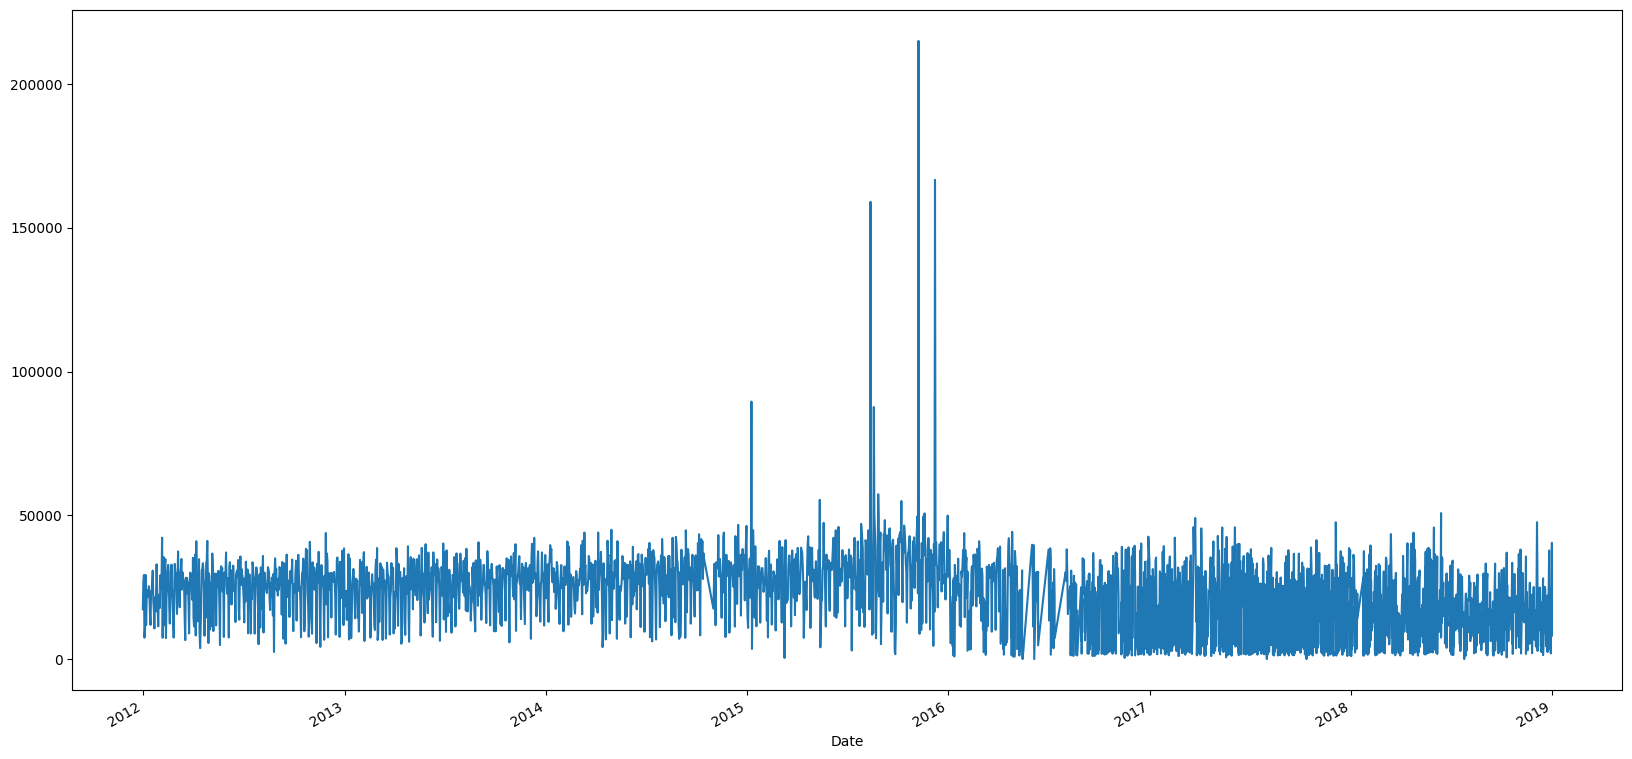

In [2]:
df['Amount'].plot(figsize=(20,10))

Step 2: Is the data set stationary?

In [3]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

     if dftest[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
     else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adf_test(df['Amount'])

1. ADF :  -2.6268617821858267
2. P-Value :  0.08757159017463384
3. Num Of Lags :  29
4. Num Of Observations Used For ADF Regression: 2958
5. Critical Values :
	 1% :  -3.432562638221284
	 5% :  -2.86251759835993
	 10% :  -2.567290402173133
weak evidence against null hypothesis,indicating it is non-stationary 


Step 3: Determine ARIMA Model

In [4]:
!pip install pmdarima
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Amount'], trace=True, suppress_warnings=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.9 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=64348.994, Time=2.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=66914.766, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=65418.683, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=64446.259, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=66912.767, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=64347.620, Time=2.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=64433.571, Time=1.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=64434.686, Time=1.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=64332.207, Time=1.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=64354.798, Time=1.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=64334.092, Time=2.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=

Step 4: Splitting the data set into training & testing sets
A common practice is to use around 70-80% of the data for training and the remaining 20-30% for testing

In [5]:
print(df.shape)
train_size = int (len(df)*0.8)
train=df.iloc[:train_size] #up to n
test=df.iloc[train_size:] #last n
print(train.shape,test.shape)

(2988, 3)
(2390, 3) (598, 3)


Step 5: The ARIMA Model

In [6]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Amount'],order=(3,1,3))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                 2390
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -25799.970
Date:                Wed, 14 Jun 2023   AIC                          51613.939
Time:                        14:47:03   BIC                          51654.390
Sample:                             0   HQIC                         51628.659
                               - 2390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9431      3.849     -0.245      0.806      -8.488       6.602
ar.L2         -0.1420      2.389     -0.059      0.953      -4.824       4.540
ar.L3          0.0188      0.136      0.138      0.890      -0.248       0.285
ma.L1         -0.1553      3.852     -0.040      0.968      -7.705       7.395
ma.L2         -0.6621      1.847     -0.358      0.720      -4.282       2.958
ma.L3         -0.1348      1.870     -0.072      0.943      -3.799       3.530
sigma2      1.508e+08    2.1e-06   7.19e+13      0.000    1.51e+08    1.51e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            112291.04
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                             2.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.94e+29. Standard errors may be unstable.
"""

Step 5: Prediction on Test Set

In [7]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=df.index[start:end+1]
print(pred)

Date
2017-12-19    13790.853430
2017-12-20    20034.266141
2017-12-20    15606.294210
2017-12-21    18529.596153
2017-12-21    16518.507834
                  ...     
2018-12-29    17341.787617
2018-12-29    17341.787617
2018-12-30    17341.787617
2018-12-31    17341.787617
2018-12-31    17341.787617
Name: ARIMA Predictions, Length: 598, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

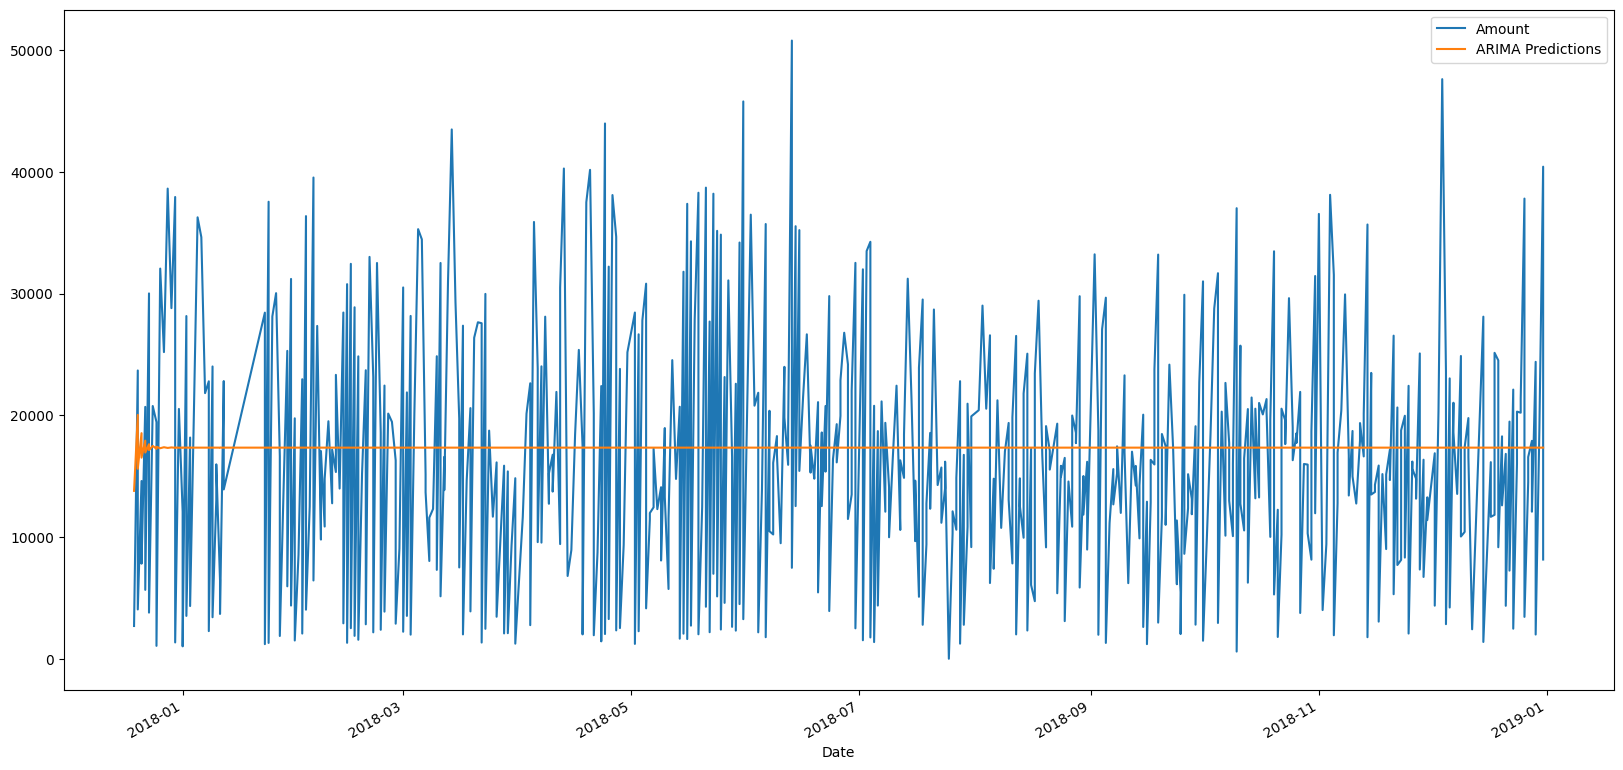

In [8]:
test['Amount'].plot(legend=True, figsize=(20,10))
pred.plot(legend=True, figsize=(20,10))

Check Model Accuracy

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Amount']))
print(rmse)

10156.598581122365


In [10]:
mean=test['Amount'].mean()
print(mean)
print(rmse*100/mean)

16373.879598662208
62.029273636238216


Predicting the future

In [11]:
model2=ARIMA(df['Amount'],order=(3,1,3))
model2=model2.fit()
df.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,area,waste_type,Amount
Date,,,
2018-12-29,Boralesgamuwa UC,MSW,24390
2018-12-29,Boralesgamuwa UC,Sorted Organic Waste,1990
2018-12-30,Boralesgamuwa UC,MSW,18960
2018-12-31,Boralesgamuwa UC,MSW,40420
2018-12-31,Boralesgamuwa UC,Sorted Organic Waste,8150


In [12]:
index_future_dates=pd.date_range(start='2019-01-01',end='2019-01-08')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+7,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2019-01-01    20156.240988
2019-01-02    14514.144929
2019-01-03    15096.553014
2019-01-04    15069.124209
2019-01-05    16181.356199
2019-01-06    16907.508856
2019-01-07    16985.206077
2019-01-08    16452.017432
Freq: D, Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

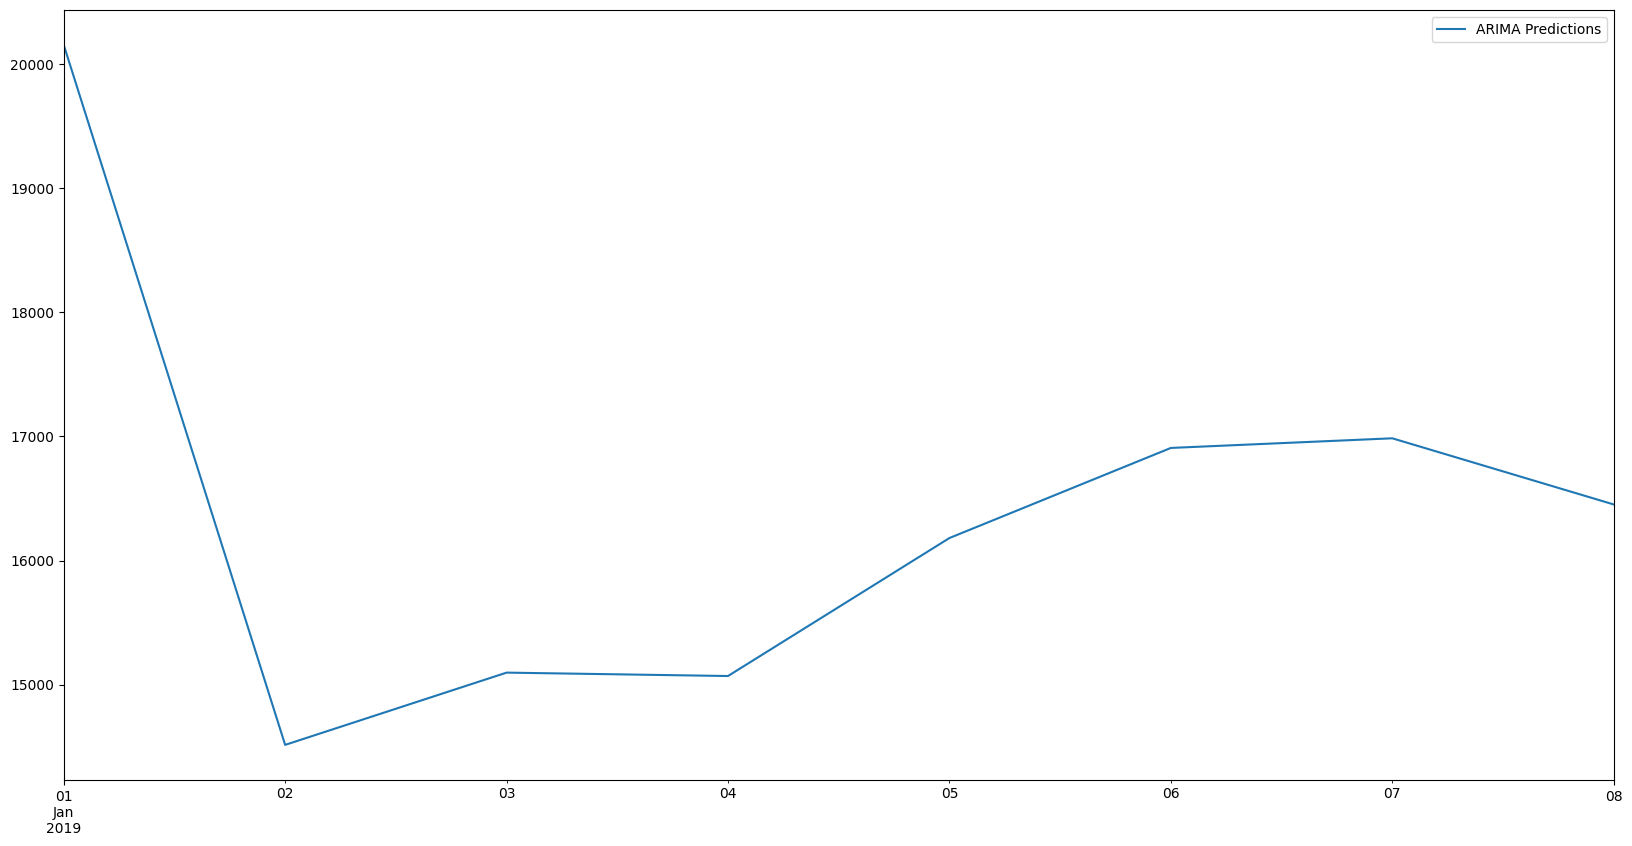

In [13]:
pred.plot(figsize=(20,10),legend=True)

Insufficient model complexity: ARIMA models consist of autoregressive (AR),
moving average (MA), and integrated (I) components. The AR component captures the relationship between the current observation and past observations, while the MA component models the dependency on past forecast errors. The I component handles any necessary differencing to make the time series stationary. If the model has insufficient complexity or does not incorporate all necessary components, it may fail to capture the underlying patterns and exhibit a constant prediction line.

Incorrect model selection: Choosing the right order of the ARIMA model (the number of AR, MA, and differencing terms) is crucial. If you select an inappropriate order, such as an ARIMA(0,0,0) model, the predictions will be based solely on the mean or level of the historical data, resulting in a straight prediction line.

Insufficient training data: ARIMA models require an adequate amount of historical data to capture meaningful patterns and relationships. If your dataset is small or lacks variation, the model may struggle to identify any meaningful trends or patterns, leading to a constant prediction line.

Presence of white noise: If your time series exhibits white noise characteristics, which means it lacks any discernible patterns or trends, the ARIMA model will produce constant predictions. White noise can occur when the data is purely random or when the underlying signal is weak and difficult to capture.

